<a href="https://colab.research.google.com/github/Aquianet/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random
dir(random)  # Reminding ourselves what we can do here

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something
import numpy as np
users = []

for _ in range(250):
  # Desktop users
#   time_on_site = random.uniform(10, 600)
  time_on_site = np.random.normal(9.4*60, 3*60)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
#   time_on_site = random.uniform(5, 300)
  time_on_site = np.random.normal(7.5*60, 2*60)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users) #good practice to shuffle
print(users[:10])

[User(purchased=False, time_on_site=479.7182772280099, mobile=True), User(purchased=True, time_on_site=318.4268876758749, mobile=True), User(purchased=False, time_on_site=173.35183977980654, mobile=True), User(purchased=True, time_on_site=600.7707265586077, mobile=True), User(purchased=True, time_on_site=704.1784802241743, mobile=False), User(purchased=False, time_on_site=590.372443059404, mobile=True), User(purchased=True, time_on_site=554.4028592093285, mobile=True), User(purchased=True, time_on_site=756.0445612550718, mobile=False), User(purchased=False, time_on_site=645.8875948373513, mobile=True), User(purchased=False, time_on_site=438.32812183754606, mobile=False)]


In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)

user_data.head(10)

NameError: ignored

In [0]:
import matplotlib.pyplot as plt

user_data.groupby(['mobile']).time_on_site.hist(bins = 10, alpha = .7) #creates histogram grouped by mobile column
plt.title('time on site by surce (destop vs mobile)')
plt.show()

NameError: ignored

In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,97.51617408433685,127.91114573986295,131.40973749621543,142.26184514457958,144.0315160449818,146.4313914039156,155.570116976468,159.06559043707506,161.99666486898934,164.83043834871427,173.11007914501545,173.35183977980654,174.90275541786855,180.46150111400027,184.26059063835112,187.8221697875253,197.2270619019929,198.5539478952427,204.67145799520478,207.98219246430273,209.97018134699428,213.38895399783877,214.15469376324387,214.39076170658586,216.17497975288828,216.3582627817966,216.72125798162955,217.4076535497319,218.67677977749815,218.90157295193046,219.68964150577605,220.09186871206848,221.754899564657,223.01315623909377,224.6419159807331,224.65104612008986,232.39442516044898,233.04667830509246,235.77526501670076,239.17325492734162,...,758.9629606403432,760.3551491788639,778.686364955959,786.0853400350796,786.3479767639101,790.7521236330629,791.7950904822854,792.084173999003,798.143977859269,799.6081996507681,808.7658056149107,808.9367107143419,813.7533190300092,831.6590536605496,834.2552145029276,835.3094133578611,839.7680192346786,840.0636125280366,842.0081079699161,843.1206826194295,868.8756077835517,869.4154230586753,873.7914770029095,878.6206444697561,879.6773361205496,881.4379092076626,883.6791116176021,887.9484754814546,888.6067180801144,896.5314302174161,898.5296891625744,898.5739064712936,903.1279171651611,905.5665310246652,906.3812273340773,919.3220310767588,921.1991919730954,927.3464837152276,964.307284711285,1046.3084184078612
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,0,1,0,0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
True,1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,1,...,1,0,1,1,1,0,1,0,1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0


In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

# time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
# pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins,  normalize='columns')

NameError: ignored

In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

In [0]:
#tqdm fucnmtion for loading par
# us %timeit to see how fast lop runs

In [0]:
from tqdm import tqdm
tqdm.pandas(desc="my bar!")
%timeit df['c2'] = df['a'].progress_apply(lambda x: x**2)

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [0]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_persons = pd.read_csv('https://raw.githubusercontent.com/Aquianet/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
print(df_persons.shape)
df_persons.head()

(1200, 4)


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [10]:
# time_bins = pd.cut(df_persons['exercise_time'], 5)
# pd.crosstab(df_persons['weight'], time_bins)

time_bins = pd.cut(df_persons['exercise_time'], 5)
weight_bins = pd.cut(df_persons['weight'], 3)
pd.crosstab(weight_bins, time_bins, normalize='index')

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
weight,,,,,
"(99.854, 148.667]",0.142140,0.178930,0.192308,0.212375,0.274247
"(148.667, 197.333]",0.225653,0.334917,0.220903,0.154394,0.064133
"(197.333, 246.0]",0.541436,0.375691,0.082873,0.000000,0.000000


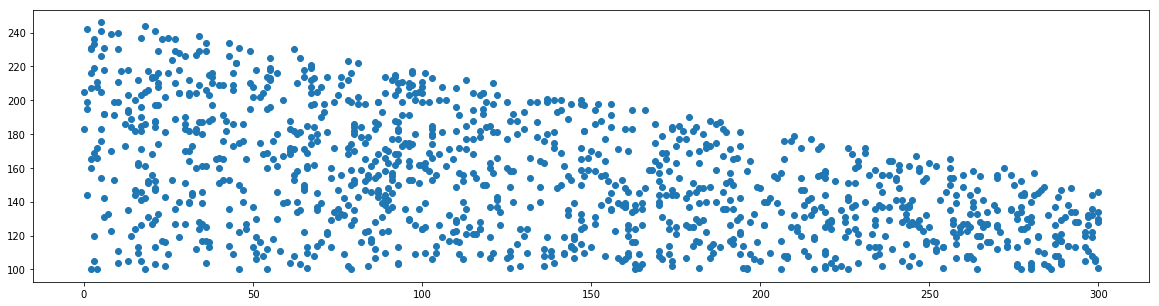

In [23]:
plt.figure(figsize=(20, 5))
plt.scatter(df_persons['exercise_time'], df_persons['weight'])
plt.show();

In [0]:
plt.pe

In [8]:
age_bins = pd.cut(df_persons['age'], 3)
weight_bins1 = pd.cut(df_persons['weight'], 4)
pd.crosstab(age_bins, weight_bins1, normalize='index' )

weight,"(99.854, 136.5]","(136.5, 173.0]","(173.0, 209.5]","(209.5, 246.0]"
age,,,,
"(17.938, 38.667]",0.410798,0.349765,0.180751,0.058685
"(38.667, 59.333]",0.421875,0.320312,0.192708,0.065104
"(59.333, 80.0]",0.300000,0.320513,0.261538,0.117949


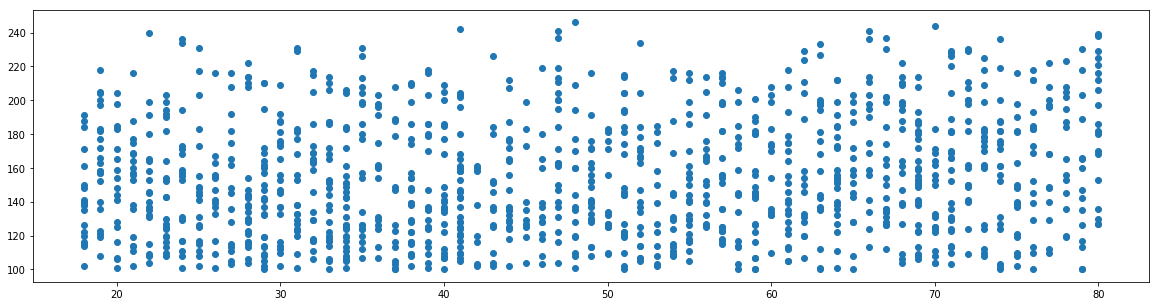

In [26]:
plt.figure(figsize=(20, 5))
plt.scatter(df_persons['age'], df_persons['weight'])
plt.show();

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
age, wieght, and time are quantative values. 
all variable types in the data set are continuos and ordinal. 

2.  What are the relationships between the variables?
wieght and age have a slight postive corralation becuase between ages 20 and 40, about 70% are under 175lbs. between age 60 and 80, only about 60 percent are under 175 lbs. 
Time spent exercising and wieght have an inverse relationship becuase over 50% of those who work out under 60min wiegh over 200 lbs while no on who works outs over 180mins wieghs over 200lbs. 

3.  Which relationships are "real", and which spurious?

i think there a clear relationship between time spent working out and weight.There seem to be additional factors for Age vs weight becuase there seems to be a more even distribution.  


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)